### Stocks from Yahoo finance against ABC news

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.offline as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
# Bank of America Corporation (BAC)
DATA_SRC_1 = "../dataset/finance.yahoo.com/BAC.07.2017-12.2017.csv"
# Citigroup Inc. (C)
DATA_SRC_2 = "../dataset/finance.yahoo.com/Citigroup.07.2017-12.2017.csv"
NEWS_SRC = 'df_abc_news_score.csv'

In [3]:
df1 = pd.read_csv(DATA_SRC_1, index_col='Date', parse_dates=True, usecols=['Date', 'Close', 'Volume'])
df2 = pd.read_csv(DATA_SRC_2, index_col='Date', parse_dates=True, usecols=['Date', 'Close', 'Volume'])

In [4]:
df1.head(2), df1.tail(2)

(            Close    Volume
 Date                       
 2017-06-30  24.26  84005200
 2017-07-03  24.68  58129700,                 Close    Volume
 Date                           
 2017-12-28  29.799999  37914900
 2017-12-29  29.520000  40672000)

In [5]:
data1 = [go.Scatter(x=df1.index, y=df1.Close)]
fig = go.Figure(data=data1, layout={'height':350, 'width':1000, 'title': 'Bank of America(BAC)'})
py.iplot(fig)

In [6]:
data2 = [go.Scatter(x=df2.index, y=df2.Close)]
fig = go.Figure(data=data2, layout={'height':350, 'width':1000, 'title': 'Citigroup(C))'})
py.iplot(fig)

In [7]:
df_news_score = pd.read_csv(NEWS_SRC, parse_dates=True, index_col='publish_date')
df_news_idx = df_news_score.index
df_news_score.head(2)

,t00,t02,t04,t05,t06,t07,t08,t09,t10,t13,...,t80,t81,t82,t83,t84,t85,t86,t88,news_score,other_topic
publish_date,,,,,,,,,,,,,,,,,,,,,
2017-06-01,-0.196,-1.078,-0.126,0.362,0.0,0.0,0.0,0.000,0.000,0.155,...,-2.107,-0.310,-0.3,-0.167,0.000,-1.255,0.0,0.000,-20.0,0.201
2017-06-02,-0.410,0.064,0.000,0.786,0.0,0.0,0.0,0.237,-0.539,0.043,...,0.391,0.227,0.0,-0.948,-0.355,-0.870,0.0,0.201,-8.0,-0.456


In [8]:
min_idx = max(df1.index[0], df_news_idx[0])
max_idx = min(df1.index[-1], df_news_idx[-1])
min_idx, max_idx

(Timestamp('2017-06-30 00:00:00'), Timestamp('2017-12-29 00:00:00'))

In [9]:
df1_c = df1.loc[min_idx:max_idx]
df2_c = df2.loc[min_idx:max_idx]
df_news_c = df_news_score.loc[min_idx:max_idx]

In [10]:
def minmax_elem(cdict):
    val = sorted(cdict.items(), key=lambda x: x[1])
    return val[0], val[-1]

MAX_NEG_SHIFT, MAX_POS_SHIFT = 6, 3 
mmin, mmax = ('', (0, 10)), ('', (0, -10))
max_lst = []

def set_minmax(cat, e1):
    global mmin, mmax
    if e1[1] < mmin[1][1]:
        mmin = (cat, e1)
    if e1[1] > mmax[1][1]:
        mmax = (cat, e1)

def best_shift(base_df):
    ''' calculate the best offset for strongest correlataion between "base" and df_news_c columns '''
    global mmin, mmax
    mmin, mmax = ('', (0, 10)), ('', (0, -10))
    for col in df_news_c.columns:
        close_corr = {i: base_df.corr(df_news_c[col].shift(i)) for i in range(-MAX_NEG_SHIFT, MAX_POS_SHIFT)}
        min_elem, max_elem = minmax_elem(close_corr)
        set_minmax(col, min_elem)
        set_minmax(col, max_elem)
        max_lst.append((col, max_elem))
        print('{0:>30}:   lower:{1[0]: 2d}({1[1]: .3f}), upper:{2[0]: 2d}({2[1]: .3f})'
              .format(col, min_elem, max_elem))
    print('- {0[0]}:{0[1][0]}({0[1][1]: .3f})'.format(mmin))
    print('- {0[0]}:{0[1][0]}({0[1][1]: .3f})'.format(mmax))
    
best_shift(df1_c.Close)


                           t00:   lower:-3(-0.124), upper:-5( 0.074)
                           t02:   lower: 1(-0.178), upper:-4( 0.028)
                           t04:   lower:-3(-0.083), upper:-5( 0.042)
                           t05:   lower:-1(-0.176), upper: 2(-0.042)
                           t06:   lower:-1(-0.028), upper:-5( 0.074)
                           t07:   lower:-3(-0.086), upper:-1( 0.018)
                           t08:   lower: 2(-0.037), upper:-1( 0.101)
                           t09:   lower:-2(-0.060), upper:-4( 0.079)
                           t10:   lower:-4(-0.086), upper:-6( 0.051)
                           t13:   lower:-2(-0.042), upper:-6( 0.064)
                           t16:   lower: 1(-0.158), upper:-4( 0.122)
                           t19:   lower:-5(-0.123), upper:-3( 0.041)
                           t20:   lower: 1(-0.121), upper:-4( 0.042)
                           t22:   lower:-2(-0.120), upper:-5( 0.193)
                           t23:   

In [11]:
# mmax sorted
mmax_sorted = sorted(max_lst, key=lambda x: x[1][1], reverse=True)
mmax_sorted[:]

[('t48', (-1, 0.25598127931926823)),
 ('t32', (-4, 0.22670237339213947)),
 ('t22', (-5, 0.19318862712573162)),
 ('t29', (-2, 0.18519428173118252)),
 ('t31', (-3, 0.16341574421928523)),
 ('t79', (-2, 0.15483194298911515)),
 ('t28', (-1, 0.14457036218169647)),
 ('t43', (0, 0.14101247942859418)),
 ('t75', (-2, 0.13995337253115028)),
 ('t74', (1, 0.13646944701142186)),
 ('t38', (-4, 0.1353590002982285)),
 ('t82', (-3, 0.12621769136014163)),
 ('other_topic', (-2, 0.12225045883119966)),
 ('t72', (1, 0.12173635929464177)),
 ('t16', (-4, 0.12153984877453546)),
 ('t64', (0, 0.1126980294787376)),
 ('t62', (-2, 0.11123425189087362)),
 ('t08', (-1, 0.10053644467295934)),
 ('t84', (-4, 0.09623811078684547)),
 ('t80', (-1, 0.08659030559046642)),
 ('t71', (-4, 0.08323134186180017)),
 ('t52', (-1, 0.08247651953773537)),
 ('t09', (-4, 0.07949643206888518)),
 ('t54', (-4, 0.07676379160124863)),
 ('t00', (-5, 0.07385643627423749)),
 ('t06', (-5, 0.07384300623018111)),
 ('t77', (1, 0.07292190163593806)),


In [12]:
t48_corr = {i: df1_c.Close.corr(df_news_c['t48'].shift(i)) for i in range(-MAX_NEG_SHIFT, MAX_POS_SHIFT)}

Text(0.5, 1.0, 'correlation = f(day shift)')

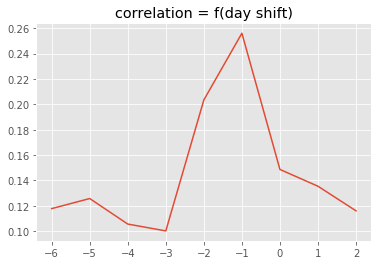

In [13]:
plt.plot(t48_corr.keys(), t48_corr.values() )
plt.title('correlation = f(day shift)')

In [14]:
MAX_NEG_SHIFT, MAX_POS_SHIFT = 6, 3 
mmin, mmax = ('', (0, 10)), ('', (0, -10))
max_lst = []
best_shift(df2_c.Close)
# mmax sorted
mmax_sorted = sorted(max_lst, key=lambda x: x[1][1], reverse=True)
mmax_sorted[:]

                           t00:   lower:-3(-0.109), upper:-5( 0.039)
                           t02:   lower:-6(-0.188), upper:-4( 0.040)
                           t04:   lower:-3(-0.092), upper: 0( 0.054)
                           t05:   lower:-1(-0.179), upper: 2(-0.026)
                           t06:   lower:-1(-0.010), upper:-2( 0.089)
                           t07:   lower:-6(-0.043), upper:-1( 0.051)
                           t08:   lower: 1(-0.098), upper:-4( 0.104)
                           t09:   lower: 1(-0.076), upper:-4( 0.083)
                           t10:   lower:-4(-0.086), upper: 0( 0.024)
                           t13:   lower:-2(-0.098), upper:-5( 0.068)
                           t16:   lower: 0(-0.168), upper:-4( 0.116)
                           t19:   lower:-5(-0.036), upper:-3( 0.156)
                           t20:   lower:-6(-0.106), upper:-4( 0.063)
                           t22:   lower:-2(-0.080), upper:-5( 0.197)
                           t23:   

[('t29', (-2, 0.24092880574418407)),
 ('t48', (-1, 0.2398618569845729)),
 ('t32', (-6, 0.22999677015693346)),
 ('t22', (-5, 0.19659330778483933)),
 ('t82', (-2, 0.17159984318560204)),
 ('t31', (-3, 0.16844523985013887)),
 ('t43', (0, 0.16109673903920937)),
 ('t38', (-4, 0.15777365169295798)),
 ('t79', (-2, 0.15719436978439436)),
 ('t19', (-3, 0.15576256417065373)),
 ('t80', (-1, 0.13252834043164669)),
 ('t74', (1, 0.12859039963203475)),
 ('t72', (1, 0.12373437242408267)),
 ('t16', (-4, 0.11637722070778897)),
 ('t64', (0, 0.11248548067213944)),
 ('t62', (1, 0.1117998535854529)),
 ('t88', (2, 0.10961886210085209)),
 ('t08', (-4, 0.10368338863924105)),
 ('t58', (-4, 0.10269141463819795)),
 ('t23', (-3, 0.10087459323373743)),
 ('t50', (0, 0.10034145300457167)),
 ('t84', (-4, 0.09997664638002798)),
 ('t52', (-2, 0.09845377522547492)),
 ('t75', (-2, 0.09442788822156914)),
 ('t45', (-6, 0.09363535218555588)),
 ('t54', (-3, 0.09113081502590337)),
 ('other_topic', (-3, 0.08928634519878559)),
 (

In [ ]:
# ax = df_news_score['news.world'].plot(figsize=(16, 4))
df_news_c['t48'].shift(-1).plot(figsize=(16, 4), color='b', title='t48')
plt.figure(figsize=(16, 4))
df1_c.Close.plot(title='Close price')

In [18]:
data2 = [go.Scatter(x=df_news_c.index, y=df_news_c['t48'])]
fig = go.Figure(data=data2, layout={'height':350, 'width':950, 'title': 't48'})
py.iplot(fig)